## Observations and Insights 

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, suffixes=('_metadata', 'results'))

df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [123]:
# Checking the number of mice in the DataFrame.
mice_number_raw = len(df['Mouse ID'])
mice_number_raw

1893

In [124]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_idx = np.where(df[['Mouse ID','Timepoint']].duplicated())[0]
duplicate_mice_idx

array([909, 911, 913, 915, 917])

In [125]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_Row = df[df.duplicated(['Mouse ID','Timepoint'])]
print(duplicated_Row)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df.drop_duplicates(subset=['Mouse ID','Timepoint'])
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [127]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(df_clean['Mouse ID'])
mice_number

1888

## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
df_mean = df_clean.groupby(['Drug Regimen']).mean()
df_median = df_clean.groupby(['Drug Regimen']).median()
df_var = df_clean.groupby(['Drug Regimen']).var()
df_std = df_clean.groupby(['Drug Regimen']).std()
df_sem = df_clean.groupby(['Drug Regimen']).sem()
summary_data = {'Tumor Volume Mean':df_mean['Tumor Volume (mm3)'], 'Tumor Volume Median':df_median['Tumor Volume (mm3)'],\
                'Tumor Volume Var':df_var['Tumor Volume (mm3)'], 'Tumor Volume STD':df_std['Tumor Volume (mm3)'],\
                'Tumor Volume SEM':df_sem['Tumor Volume (mm3)']\
               }
df_summary = pd.DataFrame(data=summary_data)
df_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
round(df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem']),2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

<function matplotlib.pyplot.show(*args, **kw)>

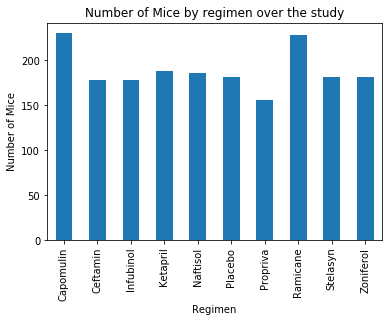

In [130]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
xgroup = df_clean.groupby('Drug Regimen')
ygroup = xgroup["Mouse ID"].count()
                
barchart = ygroup.plot(kind = "bar", title = "Number of Mice by regimen over the study", stacked=True)
barchart.set_xlabel("Regimen")
barchart.set_ylabel("Number of Mice")
                
plt.show

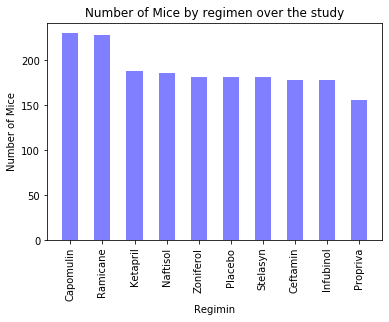

In [131]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_counts= df_clean["Drug Regimen"].value_counts()

#Creating variables for my axis
y_axis=drug_counts.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_counts.index
                 
#Needs to be matplotlib
plt.bar(x_drugs, y_axis, color='b', alpha=0.5, align= "center", width= .5)

#Formatting
plt.ylabel("Number of Mice")
plt.xlabel("Regimin")
plt.title("Number of Mice by regimen over the study")
plt.xticks(rotation=90)

plt.show()

## Pie Plots

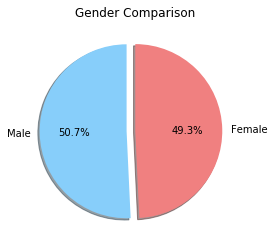

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
 # Generate a pie plot showing the distribution of female versus male mice using matplot
mf_count=df_clean["Sex"].value_counts()

#Labels for each section
labels=mf_count.index

#Values of each section 
sizes=mf_count.values

#Colors of each section

colors=["lightskyblue", "lightcoral"]

#Exploiding the male column

explode=[0.1,0]

#Using Pandas to print

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison")
plt.show()

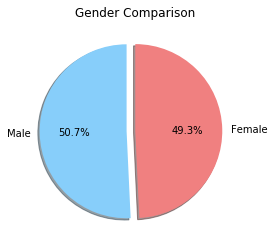

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf_count=df_clean["Sex"].value_counts()

#Labels for each section
labels=mf_count.values

#Values of each section 
sizes=mf_count.values

#Colors of each section

colors=["lightskyblue", "lightcoral"]

#Exploiding the male column

explode=[0.1,0]

#Make into a pie chart

mf_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Gender Comparison")
plt.ylabel(" ")
plt.show()

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
max_tumor=df_clean.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(df_clean, on=["Mouse ID","Timepoint"], how='left')

merge_data.round(2) 


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.71,0
245,z578,45,Ramicane,Male,11,16,30.64,0
246,z581,45,Infubinol,Female,24,25,62.75,3
247,z795,45,Naftisol,Female,13,29,65.74,3


In [135]:
# 4 regis: Capomulin, Ramicane, Infubinol, Ceftamin
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)

print(f"Any number below {round(lower_ocap, 2)} is considered an outlier")
print(f"Any number above {round(upper_ocap, 2)} is considered an outlier")

Any number below 20.7 is considered an outlier
Any number above 51.83 is considered an outlier


In [136]:
#Ramicane quartiles
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)

print(f"Any number below {round(lower_oram, 2)} is considered an outlier")
print(f"Any number above {round(upper_oram, 2)} is considered an outlier")

Any number below 17.91 is considered an outlier
Any number above 54.31 is considered an outlier


In [137]:
#Infubionol quartiles
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print(f"Any number below {round(lower_oin, 2)} is considered an outlier")
print(f"Any number above {round(upper_oin, 2)} is considered an outlier")

Any number below 36.83 is considered an outlier
Any number above 82.74 is considered an outlier


In [138]:
 #Ceftmain quartiles
quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print(f"Any number below {round(lower_oce, 2)} is considered an outlier")
print(f"Any number above {round(upper_oce, 2)} is considered an outlier")

Any number below 25.36 is considered an outlier
Any number above 87.67 is considered an outlier


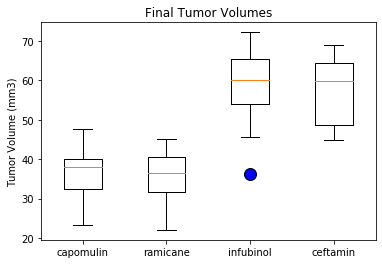

In [139]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='blue',markersize=12)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops= orange_out)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

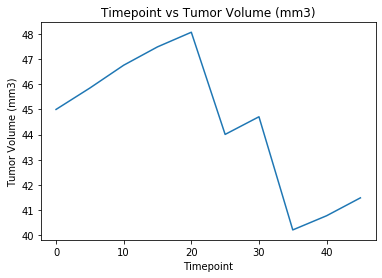

In [140]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table= df_clean.loc[df_clean['Drug Regimen'] == 'Capomulin']
mouse= df_clean.loc[df_clean['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

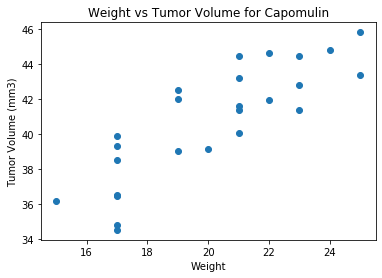

In [141]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight= df_clean.loc[df_clean['Drug Regimen'] == 'Capomulin']

cap_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show() 


## Correlation and Regression

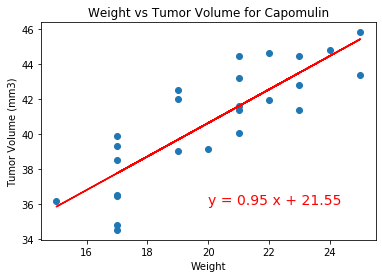

In [152]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= st.linregress(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"])
regress_values=cap_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"] )
plt.plot(cap_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

In [153]:
print(f"Correlation between these two variables is {round(rvalue,2)}")

Correlation between these two variables is 0.84
